In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,BatchNormalization
from keras import utils
from keras import regularizers
from keras.datasets import mnist

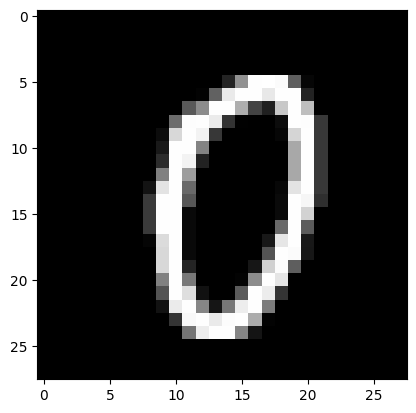

In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
# 显示数据
plt.figure()
plt.imshow(x_train[1000],cmap="gray")

In [3]:
x_train = x_train.reshape(60000,784)
x_train = x_train.astype('float32')
x_train = x_train/255

x_test = x_test.reshape(10000,784)
x_test = x_test.astype("float32")
x_test = x_test/255

y_train = utils.to_categorical(y_train,10)
y_test = utils.to_categorical(y_test,10)

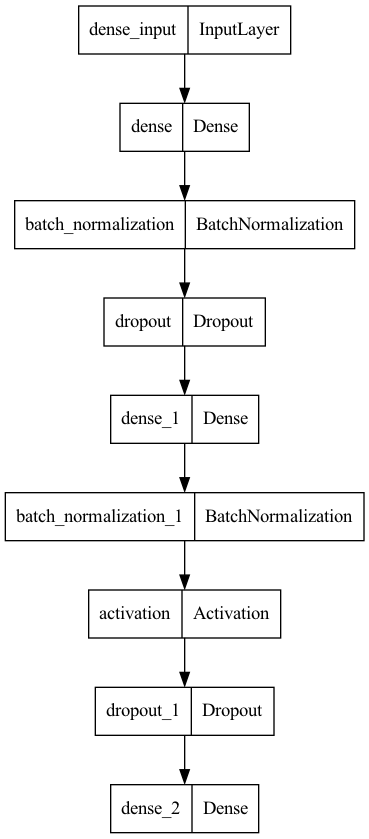

In [4]:
model = Sequential()
# 1st hidden layer
# 先激活, 后BN
model.add(Dense(512,activation = "relu",input_shape=(784,)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# 2ed hidden layer
# 先BN, 后激活
model.add(Dense(512,kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(Dropout(0.2))

# outlayer
model.add(Dense(10,activation="softmax"))

utils.plot_model(model)

In [5]:
model.compile(loss= tf.keras.losses.categorical_crossentropy,optimizer = tf.keras.optimizers.Adam(), metrics=tf.keras.metrics.categorical_accuracy)
history = model.fit(x_train,y_train,epochs=4,batch_size=128,validation_data=(x_test,y_test),verbose=1)

Epoch 1/4


2023-04-11 19:43:11.620220: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


469/469 [==============================] - 3s 6ms/step - loss: 1.0058 - categorical_accuracy: 0.9308 - val_loss: 0.2867 - val_categorical_accuracy: 0.9521
Epoch 2/4
469/469 [==============================] - 3s 6ms/step - loss: 0.2607 - categorical_accuracy: 0.9598 - val_loss: 0.2260 - val_categorical_accuracy: 0.9671
Epoch 3/4
469/469 [==============================] - 3s 6ms/step - loss: 0.2333 - categorical_accuracy: 0.9657 - val_loss: 0.2383 - val_categorical_accuracy: 0.9662
Epoch 4/4
469/469 [==============================] - 3s 6ms/step - loss: 0.2140 - categorical_accuracy: 0.9694 - val_loss: 0.2091 - val_categorical_accuracy: 0.9681


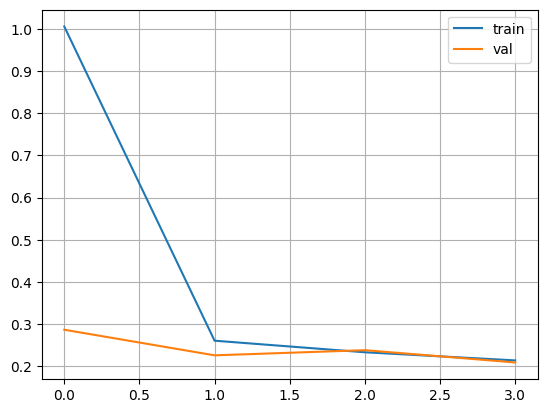

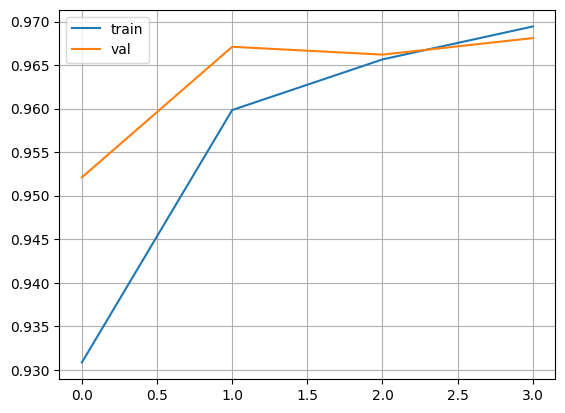

In [10]:
plt.figure()
plt.plot(history.history['loss'],label="train")
plt.plot(history.history["val_loss"],label="val")
plt.legend()
plt.grid()

plt.figure()
plt.plot(history.history['categorical_accuracy'],label="train")
plt.plot(history.history["val_categorical_accuracy"],label="val")
plt.legend()
plt.grid()

In [12]:
tensorboard = tf.keras.callbacks.TensorBoard(log_dir = "./graph")

history = model.fit(x_train,y_train,epochs=4,validation_data=(x_test,y_test),batch_size=128,
                    verbose=1,callbacks=[tensorboard])

model.evaluate(x_test,y_test,verbose=1)
# model.save("model.h5")
# model = tf.keras.models.load_model("model.h5")

Epoch 1/4
469/469 [==============================] - 3s 6ms/step - loss: 0.1983 - categorical_accuracy: 0.9723 - val_loss: 0.2207 - val_categorical_accuracy: 0.9678
Epoch 2/4
469/469 [==============================] - 3s 7ms/step - loss: 0.1906 - categorical_accuracy: 0.9742 - val_loss: 0.2145 - val_categorical_accuracy: 0.9681
Epoch 3/4
469/469 [==============================] - 3s 7ms/step - loss: 0.1869 - categorical_accuracy: 0.9751 - val_loss: 0.1925 - val_categorical_accuracy: 0.9736
Epoch 4/4
313/313 [==============================] - 0s 963us/step - loss: 0.2060 - categorical_accuracy: 0.9719


[0.20601855218410492, 0.9718999862670898]